# Brief Project Summary.
- In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
- In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

    - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
    - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

#Read the data. 
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', encoding='Latin-1')
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv', encoding='Latin-1')

In [2]:
# A quick display 150 columns max to prevent truncated display of columns.
pd.options.display.max_columns = 150
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

As you can see, many of these columns contain a lot of `NaN` or `null` values. However, to determine if the employees who worked for a short period of time resigned due to a dissatisfaction, we don't need a lot of these columns.

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [6]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In the `tafe_survey` dataframe, there are a lot of columns that contain many `NaN` values. There are even some that have values that are Not Stated. But like the `dete_survey` dataframe, there are a lot of columns we don't need to use to analyze whether or not short-term employees resigned because of a dissatisfaction. I also found that both dataframes contain many of the same columns. There were many columns in the dataframes that tells us that a certain number of employees resigned because of some sort of dissatisfaction.

# Simplifying the Dataframes.

Re-reading the datasets as dataframes but this time we will also be replacing `Nan` Values with `Not Stated`.

In [7]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', encoding='Latin-1', na_values= 'Not Stated')

#Dropping the columns we don't need for our analysis.
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [8]:
# Print all the column names we need to make our analysis.
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Since some `tafe_survey` dataframe had columns contained 'Not Stated' values, we also had to make sure we did the same thing for our `dete_survey` dataframe as well since it's likely that we will have to merge these two dataframes into one. We also made sure to drop the columns in both dataframes that we didn't need in order to narrow our focus down to all the important datapoints we will need to complete our analysis. 

# Updating and Re-naming columns.

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+','_').str.replace(' ','').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [10]:
#First 5 rows of dete_survey_updated. 
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The `tafe_survey_updated` dataframe has a lot of the same columns as the `dete_survey_updated` dataframe except they have different names. There are columns in both dataframes we will need to make our final analysis so to make it easier, we renamed some of the columns in the `tafe_survey_updated` dataframe to the names in their respective identical columns in the `dete_survey_updated` dataframe.

In [11]:
#Using the column names as column indexes wasn't working so I had to use their numerical indexes.
mapping = {tafe_survey_updated.columns[0]: 'id', tafe_survey_updated.columns[3]: 'cease_date', 
                               tafe_survey_updated.columns[4]: 'separationtype', 
               tafe_survey_updated.columns[17]: 'gender', 
               tafe_survey_updated.columns[18]: 'age',
       tafe_survey_updated.columns[19]: 'employment_status',
      tafe_survey_updated.columns[20]: 'position',
       tafe_survey_updated.columns[21]: 'institute_service',
       tafe_survey_updated.columns[22]: 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=mapping)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [12]:
#First 5 rows of tafe_survey_updated. 
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [13]:
#Reviewing unique values in the 'seperationtype' column in dete_survey_updated.
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
#Reviewing unique values in the 'seperationtype' column in tafe_survey_updated.
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

# Filtering data based on Resignation.
The `dete_survey_updated` dataframe has 3 types of Resignations whereas `tafe_survey_updated` dataframe has only 1. Since we have to merge both frames together, we have to ensure that all the identical columns from both frames have the same exact name and values. 

In [15]:
#Replacing all 3 types of Resignations into 1. 
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

As you can see from the information above, we were able to combine all of 3 different types of Resignations in `dete_survey_updated` into one Resignation type. 

In [16]:
#Filtering both dataframes to rows whose 'separationtype' column is 'Resignation' only.
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation']
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

# Filtering dates and creating Visualizations.
Here we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense based on these criterias: 
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [17]:
#Reviewing unique values in the 'cease_date' column in dete_resignations.
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [18]:
#Reviewing unique values in the 'dete_start_date' column in dete_resignations.
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [19]:
#Using string methods to extact the years in the 'cease_date' and 'dete_start_date' columns.

dete_resignations = dete_resignations.copy() #Using .copy() method to get around 'SettingWithCopy' warning.

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Displaying years as a float data type.
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [20]:
dete_resignations['cease_date'].value_counts().sort_values(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['dete_start_date'].value_counts().sort_values(ascending=False)

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1990.0     5
1993.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1976.0     2
1983.0     2
1974.0     2
1982.0     1
1973.0     1
1975.0     1
1987.0     1
1977.0     1
1984.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [22]:
#Reviewing unique values in the 'cease_date' column in tafe_resignations.
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [23]:
#Creating visualizations for our data to find out what may have went wrong.
import matplotlib.pyplot as plt
dete_resignations['cease_date'].hist(bins=25, range = (2005,2015))

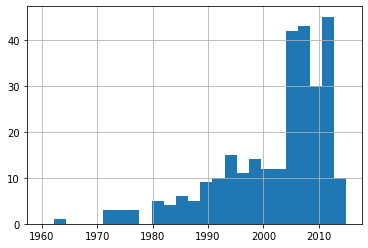

In [24]:
dete_resignations['dete_start_date'].hist(bins=25, range = (1960,2015))

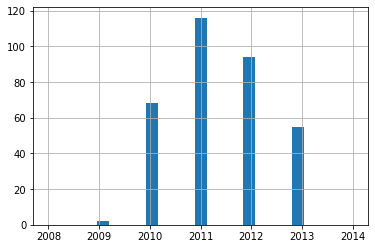

In [25]:
tafe_resignations['cease_date'].hist(bins=25, range = (2008, 2014))

From the visualizations created above, I found that the dates don't completely align. The only years that align in the `cease_date` column for both dataframes are: 2010, 2012, and 2013. Additionally, the visual for the `cease_date` column in the `tafe_resignations` dataframe shows a higher count in 2010 than the `cease_date` column in the `dete_resignations` column for that same year. This still isn't a major issue though. We should still be able to work with this.

# Creating a new column in `dete_resginations`.

Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` dataframe already contains a `service` column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in dete_resignations.

In [26]:
#Creating a new column called 'institute_service' which contains the number of years each employee was employed for.
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [27]:
#A quick review of our results.
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Updating values in all Dissatisfaction columns and creating a new column.
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
- For `tafe_resignations`:
  - Contributing Factors. Dissatisfaction
  - Contributing Factors. Job Dissatisfaction

- For `dete_resignations`:
   - job_dissatisfaction
   - dissatisfaction_with_the_department
   - physical_work_environment
   - lack_of_recognition
   - lack_of_job_security
   - work_location
   - employment_conditions
   - work_life_balance
   - workload

If the employee indicated that there were dissatisfying factors that caused him/her to resign, we would mark their response down in a newly created column called `dissatisfaction`. In that column, the employee's response would be listed as either `True`, `False`, or `NaN`. `True`: indicating that the employee resigned because of a dissatisfaction. `False`: indicating that the employee did not resign because of an dissatisfactions. `Nan`: indicating that the employee resigned but did not indicated whether or not it was because of any dissatisfactions.
 

In [28]:
#Reviewing all the unique values in both the Dissatisfaction columns of tafe_resignations.
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
#Creating a function that updates the values in the 'dissatisfaction' columns to True, False, or Nan.
def update_vals(row_value):
    if row_value == '-':
        return False
    elif pd.isnull(row_value):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction'
                                                      ]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                       'physical_work_environment','lack_of_recognition',
                                                       'lack_of_job_security','work_location','employment_conditions',
                                                       'work_life_balance','workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [31]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Creating a new column and dropping columns we don't need.
Below, we created a new column called `institute` identifying which dataframe each row came from before combining both dataframes together. We then combined our dataframes and then dropped all the columns that we won't need for our analysis.

In [33]:
#Creating a new column in each dataframe and filling it values identifying which dataframe the row came from.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#Combining both dataframes. 
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [34]:
#Checking for the sum of non-null values to identify which columns should be dropped.
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [35]:
#Dropping columns with less than 500 non-null values.
combined_updated = combined.dropna(thresh = 500, axis = 1)

#Checking to make sure the right columns got dropped.
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

# Cleaning up our `institute_service` column.

Before we can perform any kind of analysis, we have to clean up the `institute_service` column. It's a bit tricky cleaning up this column as its values come in the following forms: 
    - NaN                 88
    - Less than 1 year    73
    - 1-2                 64
    - 3-4                 63
    - 5-6                 33
    - 11-20               26
    - 5.0                 23
    - 1.0                 22
    - 7-10                21
    - 0.0                 20
    ...

So we have to seperate values into several different categories before we make an analysis. The categories is as follows:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [36]:
#Checking for unique values in 'institute_service' column
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [37]:
#Change the value type for this column to type 'str'.
combined_updated = combined_updated.copy()

#Extract only the numbers in the string values in the 'institute_service' column.
combined_updated['institute_service_updated'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_updated'] = combined_updated['institute_service_updated'].astype('float')

In [38]:
#Check values to make sure they are floats.
combined_updated['institute_service_updated'].value_counts().sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_updated, dtype: int64

In [39]:
#Creating a function that maps each value to the career stage definition listed in the markup above.
def mapvalue(val):
    if pd.isnull(val):
        return np.nan
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    else:
        return 'New'
    
#Applying function to the 'institute_service' column.
combined_updated['service_cat'] = combined_updated['institute_service_updated'].apply(mapvalue)

In [40]:
#Check for unique values in the column 'service_cat'.
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Initializing our Analysis.

In [41]:
#Confirming the number of True and False values in the 'dissatisfied' column.
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
#Filling in the missing values with the True or False values that occurs more frequently, which is False.
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [62]:
#Re-confirming the number of True and False values in the 'dissatisfied' column.
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [63]:
diss_pct

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


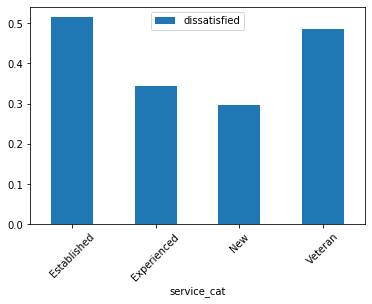

In [49]:
diss_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
%matplotlib inline
diss_pct.plot(kind='bar', rot=45)

We've found that over 50% of Established employees of 7-10 years of service resigned because of a dissatisfaction alongside about 50% of Veteran employees with 11 years or more of service, about 35% of Experienced employees with 3-6 years of service, and a little under 30% of New employees with service of less than 3 years.

# Cleaning the `Age` Column.

In [50]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45          45
46-50            42
36-40            41
46  50          39
26-30            35
21  25          33
31  35          32
26  30          32
36  40          32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Here we have to decide what to do with our data in the `age` column.
- Do we drop all rows containing `NaN` values? Yes.
- Do we fill the `NaN` values with an age? No.
- How do we categorize the data? There is one way that comes to mind. First, there are some unique values that appear to be unique but are actually the same as some other unique values in the column. We need to use string methods to combine those values into one type of unique value, and then categorize them accordingly before we make our analyses.

In [53]:
combined_updated = combined_updated.copy()
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype('float')

In [57]:
combined_updated['age'].value_counts().sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
Name: age, dtype: int64

We seperated values in the`age` column into several different categories before making an analysis and a visual. We've decided to seperate them into the following categories: 
- Young Adults: Employees between the ages of 20 and 30 years old.
- Middle Age: Employees between the ages of 31 and 50 years old.
- Older Adults: Employees between the ages of 51 and 60 years old.
- Elderly: Employees 61 years and older.

In [60]:
#Function that categorizes the age column.
def map_age(age):
    if pd.isnull(age):
        return np.nan
    elif 20 <= age <= 30:
        return 'Young Adults'
    elif 31 <= age <= 50:
        return 'Middle Age'
    elif 51 <= age <= 60:
        return 'Older Adults'
    else:
        return 'Elderly'

combined_updated['age_cat'] = combined_updated['age'].apply(map_age)

In [70]:
age_diss_pct = combined_updated.pivot_table(index='age_cat', values='dissatisfied')*100
age_diss_pct

,dissatisfied
age_cat,
Elderly,52.173913
Middle Age,37.012987
Older Adults,40.476190
Young Adults,35.251799


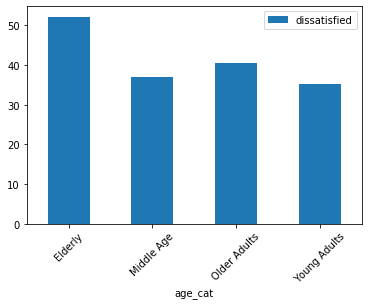

In [69]:
#Visual representation of the different age groups that were dissatisfied.
age_diss_pct = combined_updated.pivot_table(index='age_cat', values='dissatisfied')*100
%matplotlib inline
age_diss_pct.plot(kind='bar', rot=45)

According to the visual above, over 50% of elderly employees ages 61 years or older were dissatisfied. Additionally, over 40% of older adults between the ages of 51-60 years old were dissatisfied, under 40% of Middle-Age adults between the ages of 31 and 50, and about 35% of Young Adults between the ages of 21 and 30 years old. 

# Checking to see which Survey had more resignations due to Dissatisfactions
Since we've already created a column in each survey dataframe that identifies which of the resigning employees belong to which survey before combining both dataframes into 1, we can use that column to identify which survey contains to most resigations that were the result of some dissatisfaction.

In [66]:
#Displaying unique values in the 'institute' column in combined_updated.
combined_updated['institute'].value_counts(dropna=False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [71]:
#Creating a pivot table to see which survey has the most resignations resulting from some dissatisfaction.
survey_diss_pct = combined_updated.pivot_table(index='institute', values='dissatisfied')*100

#Displaying pivot table
survey_diss_pct

,dissatisfied
institute,
DETE,47.909968
TAFE,26.764706


Approximately 47.9% of all resignations for dissatisfactions belonged to the `DETE` survey dataframe, approximately 26.8% to the `TAFE` survey dataframe, and the rest were resignations for other reason other than for dissatisfactions. We can clearly see that `DETE` has the most resignations for dissatisfactions out of the 2 surveys since it has the higher percentage of resignations.